In [205]:
data_link = "../trainingSet"
model_link = "../model"

In [206]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import cv2
import os
from tabulate import tabulate
tf.random.set_seed(42)


In [207]:
class Train:
    def __init__(self, data_link):
        self.data_link = data_link
    def total_img(self):
        total = 0
        for label in os.listdir(self.data_link):
            total += len(os.listdir(os.path.join(self.data_link, label)))
        return total
    def prepare_data(self):
        self.x, self.y = [], []
        labels = os.listdir(self.data_link)
        I = np.eye(len(labels))
        total_img = self.total_img()
        sub_size = int(np.ceil(np.sqrt(len(labels))))
        plt.figure(figsize=(2*sub_size, 2*sub_size))
        with tqdm(total=total_img, desc="Loading images") as pbar:
            for label in labels:
                image_names = os.listdir(os.path.join(self.data_link, label))
                for name in image_names:
                    img_path = os.path.join(self.data_link, label, name)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (28, 28))
                    img = np.expand_dims(img, axis=-1)
                    self.x.append(img)
                    self.y.append(I[int(label)])
                    pbar.update(1)
                plt.subplot(sub_size, sub_size, int(label) + 1)
                plt.axis('off')
                plt.title(f'Sample [{label}]')
                plt.imshow(img, cmap='gray')
        self.x, self.y = np.array(self.x), np.array(self.y)
        print(f"Shape X and Y: {self.x.shape}, {self.y.shape}")
    def show_inf(sefl, header, data):
        print(tabulate(data, headers=header, tablefmt="grid"))
    def split_data(self):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size=0.2, random_state=42)
        self.show_inf(['Name', 'shape'], [
            ['x_train', self.x_train.shape],
            ['y_train', self.y_train.shape],
            ['x_test', self.x_test.shape],
            ['y_test', self.y_test.shape]
        ])

    def prepare_model(self):
        self.model = Sequential([
            Flatten(input_shape=(28, 28, 1)),
            Dense(128, activation="sigmoid"),
            Dense(128, activation="sigmoid"),
            Dense(10, activation='softmax')

        ])
        self.model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
    def train(self, epochs=10, batch_size=32):
        self.prepare_model()
        history = self.model.fit(
            self.x_train, self.y_train, 
            epochs=epochs, 
            batch_size=batch_size, 
            validation_split=0.2,
            shuffle=True
        )
        return history

Loading images: 100%|██████████| 42000/42000 [00:03<00:00, 11285.41it/s]


Shape X and Y: (42000, 28, 28, 1), (42000, 10)


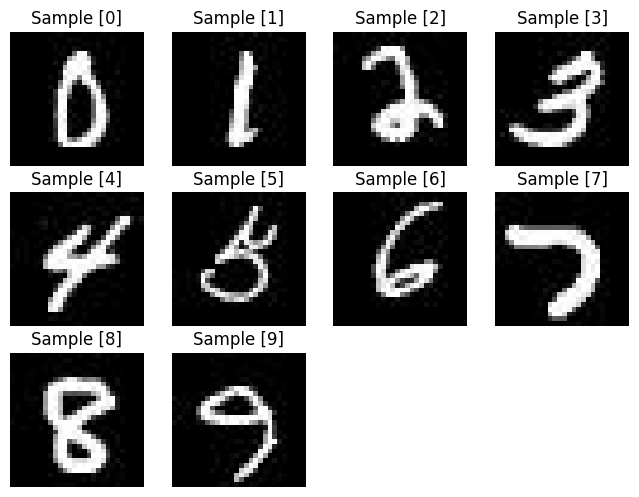

In [208]:
model = Train(data_link)
model.prepare_data()

In [209]:
model.split_data()


+---------+--------------------+
| Name    | shape              |
+=========+====================+
| x_train | (33600, 28, 28, 1) |
+---------+--------------------+
| y_train | (33600, 10)        |
+---------+--------------------+
| x_test  | (8400, 28, 28, 1)  |
+---------+--------------------+
| y_test  | (8400, 10)         |
+---------+--------------------+


In [219]:
history = model.train(128, 32)

Epoch 1/128


c:\Users\nhann\.conda\envs\env1\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6939 - loss: 1.1416 - val_accuracy: 0.8722 - val_loss: 0.4717
Epoch 2/128
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8873 - loss: 0.4067 - val_accuracy: 0.8671 - val_loss: 0.4373
Epoch 3/128
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8849 - loss: 0.3820 - val_accuracy: 0.8920 - val_loss: 0.3747
Epoch 4/128
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8943 - loss: 0.3411 - val_accuracy: 0.8872 - val_loss: 0.3691
Epoch 5/128
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8953 - loss: 0.3350 - val_accuracy: 0.8994 - val_loss: 0.3210
Epoch 6/128
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9003 - loss: 0.3150 - val_accuracy: 0.8949 - val_loss: 0.3491
Epoch 7/128
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9025 - loss: 0.3171 - val_accuracy: 0.8997 - val_loss: 0.3298
Epoch 8/128
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9061 - loss: 0.3060 - val_accuracy: 0.8938

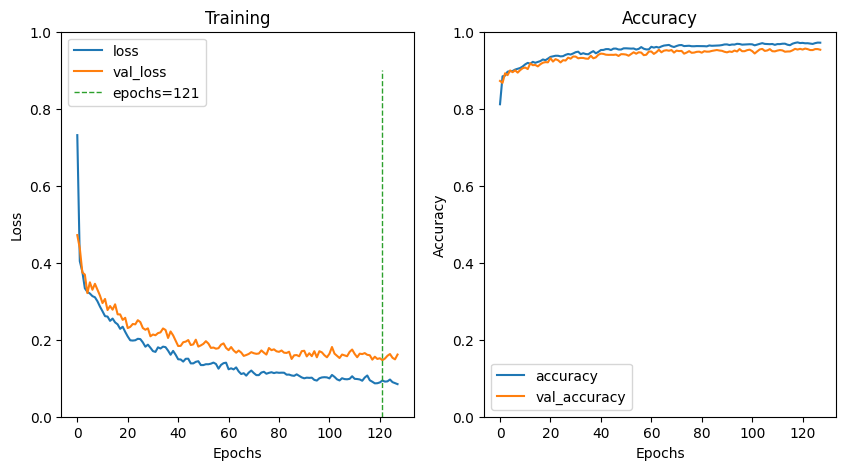

In [220]:
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

min_val = [np.argmin(val_loss) for i in range(10)]
y = [i for i in np.arange(0, 1, 0.1)]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Training')
plt.ylim(0, 1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.plot(min_val, y, linestyle='--', linewidth=1, label=f'epochs={min_val[0]}')
plt.legend()

plt.subplot(1, 2, 2)
plt.ylim(0, 1)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val_accuracy')
plt.legend()

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


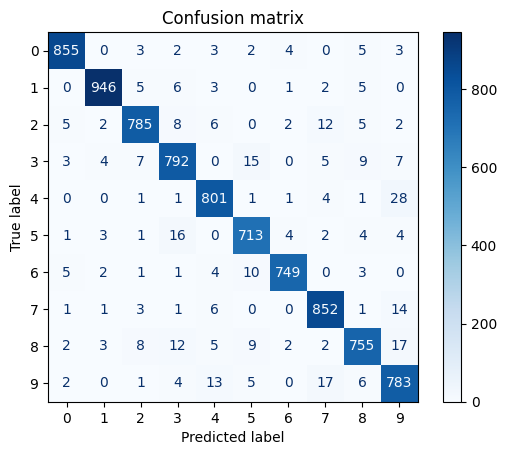

In [221]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

predictions = np.argmax(model.model.predict(model.x_test), axis=-1)
true_labels = np.argmax(model.y_test, axis=-1)
cm = confusion_matrix(true_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.show()

In [222]:
model_name = 'model.h5'
model.model.save(os.path.join(model_link, model_name))